In [1]:
#train file for one dimensionl problem
import torch
class Args:
    dim_in = 11 # default 1+2*hidden_layer_num
    dim_out = 1 #default
    hidden_layer_size = 256 #W
    hideen_layer_num = 5 #L
    penalty_coeff = 50 #beta
    epoch = 100000 # for test
    lr = 1e-3
    turncated_num = 5 #n
    num_batch = 2560 #M
args = Args()

In [2]:
from sampling_and_generate import Interior_1d_sampler,Boundary_1d_sampler,latent_generator
from normal_fc_model import FC_DNN
from one_dim import random_field,classic_primal_resudial

In [4]:
model = FC_DNN(args.dim_in,args.dim_out,args.hidden_layer_size,args.hideen_layer_num).cuda()
my_loss = classic_primal_resudial()
optimizer = torch.optim.Adam(params= model.parameters(),lr = args.lr)
loss_list = []
loss_boundary = torch.nn.MSELoss()
penalty = torch.tensor(args.penalty_coeff).float().cuda()
zeros = torch.zeros(args.num_batch,1).cuda()

In [4]:
X = Interior_1d_sampler(args.num_batch,-1,1)
S,boundary_value = Boundary_1d_sampler(args.num_batch,-1,1)
Z = latent_generator(args.num_batch,args.turncated_num)
K = random_field(X,args.turncated_num,0.1,Z)
zeros = torch.zeros(args.num_batch,1).cuda()


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [5]:
for epoch in range(args.epoch):
    X = Interior_1d_sampler(args.num_batch,-1,1).cuda()
    S,boundary_value = Boundary_1d_sampler(args.num_batch,-1,1)
    S = S.cuda()
    Z = latent_generator(args.num_batch,args.turncated_num).cuda()
    K = random_field(X,args.turncated_num,0.1,Z).cuda()
    optimizer.zero_grad()
    loss_inter = my_loss(model,X,K,Z,args.turncated_num,args.num_batch)
    final_input_boundary = torch.cat((S,Z.reshape(args.num_batch,2*args.turncated_num)),dim=1)
    loss_bound = loss_boundary(model(final_input_boundary),zeros)
    loss = loss_inter + penalty*loss_bound
    loss_inter.backward()
    optimizer.step()
    print('epoch',epoch+1,'loss',loss.item())

epoch 1 loss 3.9721248149871826
epoch 2 loss 57.216896057128906
epoch 3 loss 8.498997688293457
epoch 4 loss 2.962092399597168
epoch 5 loss 7.579596996307373
epoch 6 loss 6.033039569854736
epoch 7 loss 2.8447368144989014
epoch 8 loss 3.295422077178955
epoch 9 loss 6.981817722320557
epoch 10 loss 7.502169132232666
epoch 11 loss 5.550282955169678
epoch 12 loss 3.014097213745117
epoch 13 loss 2.1165943145751953
epoch 14 loss 2.3421709537506104
epoch 15 loss 2.879190683364868
epoch 16 loss 3.272463321685791
epoch 17 loss 3.258964776992798
epoch 18 loss 3.055100679397583
epoch 19 loss 2.8837063312530518
epoch 20 loss 2.7614314556121826
epoch 21 loss 2.8190243244171143
epoch 22 loss 3.0953783988952637
epoch 23 loss 3.2628889083862305
epoch 24 loss 3.4875690937042236
epoch 25 loss 3.4345579147338867
epoch 26 loss 3.5333292484283447
epoch 27 loss 3.2202541828155518
epoch 28 loss 2.9691526889801025
epoch 29 loss 2.7791998386383057
epoch 30 loss 2.6021058559417725
epoch 31 loss 2.5047247409820557

KeyboardInterrupt: 

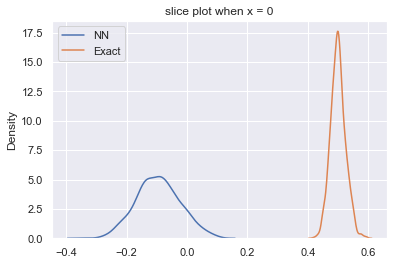

In [7]:
from plotting import Slice_plot
Slice_plot(model,torch.tensor(0),1000,5,6,0.1)

In [1]:
def random_field(x,n,beta,Z):
    '''
    shape of x: (num_of_sample,dim_of_features)
    shape of Z: (num_of_sample,2,n)
    '''
    coeff = torch.arange(start=1,end=n+1).cuda()
    new_x = torch.pi*coeff*x.repeat(1,n)
    part_1 = Z[:,0,:]*torch.sin(new_x)
    part_2 = Z[:,1,:]*torch.cos(new_x)
    V = torch.sum(part_1+part_2,dim=1)/torch.sqrt(torch.tensor(n))
    result = torch.exp(beta*V)
    return V

In [12]:
import torch
X = torch.randn(10,1).cuda()
Z = torch.randn(10,2,5).cuda()
final_input = torch.cat((X,Z.reshape(10,2*5)),dim=1)
final_input.requires_grad = True

In [18]:
import torch.autograd as ag
def grad(outputs, inputs):
    '''
    求梯度的快速函数
    '''
    return ag.grad(outputs, inputs, grad_outputs=torch.ones_like(outputs), 
                   create_graph=True)

In [12]:
final_input_boundary

tensor([[-1.0000,  0.7708,  0.2685,  ..., -0.0507, -0.4521,  0.9572],
        [-1.0000, -1.0110,  0.1293,  ...,  0.4056,  0.9439,  1.5742],
        [ 1.0000, -1.8116, -1.2462,  ...,  0.0952, -0.0597,  0.4160],
        ...,
        [-1.0000,  0.3788, -0.8005,  ..., -1.0124, -1.3269, -0.4451],
        [ 1.0000,  1.7971, -1.0649,  ...,  0.1563, -0.7378,  0.4391],
        [-1.0000,  1.4398, -0.4805,  ...,  0.8576,  0.2110,  0.4674]],
       device='cuda:0')

In [9]:
loss_inter

tensor(1.5587e-07, device='cuda:0', grad_fn=<MeanBackward0>)